# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [2]:
application_encode = pd.read_csv("application_encode.csv")
application_encode.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58,3,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,0,0,1,0,52,8,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,0,0,1,0,52,8,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
3,1,1,1,0,46,2,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,0,1,0,0,29,3,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [3]:
#Armazenando as variáveis explicativas
x = application_encode.drop('mau', axis = 1)
#Armazenando a variável target
y = application_encode['mau']

In [4]:
#Separando as base de dados para treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 50)

---

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

### Técnica de podagem parametrizada pelo ccp_alpha

In [5]:
clf = DecisionTreeClassifier(random_state = 50)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas

In [6]:
#Criando uma lista de árvores de decisão para diferentes parâmetros de ccp_alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 50, ccp_alpha = ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

In [7]:
#DataFrame da acurácia de treino e teste para diferentes valores de ccp_alpha 
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

clf_scores = pd.DataFrame({'alpha': ccp_alphas, 'train_score': train_scores, 'test_score': test_scores})
clf_scores.set_index('alpha', inplace = True)
clf_scores

,train_score,test_score
alpha,,
0.000000e+00,0.989018,0.971171
0.000000e+00,0.989018,0.971171
5.493403e-07,0.989018,0.971171
2.042859e-06,0.989018,0.971171
2.563588e-06,0.989018,0.971171
...,...,...
1.813170e-04,0.976491,0.979780
1.814546e-04,0.976233,0.979379
1.961145e-04,0.976062,0.978779


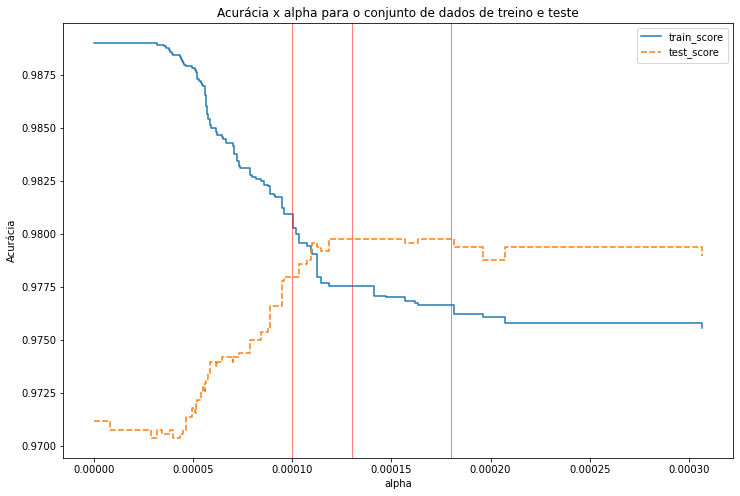

In [8]:
#Potagem da acurácia x alpha para o conjunto de dados de treino e teste
fig, ax = plt.subplots(figsize = (12, 8))
sns.lineplot(data = clf_scores, drawstyle = 'steps-post')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia x alpha para o conjunto de dados de treino e teste')
ax.axvline(x = 0.00010, alpha = 0.5, color = 'r', linewidth = 1)
ax.axvline(x = 0.00013, alpha = 0.5, color = 'r', linewidth = 1)
ax.axvline(x = 0.00018, alpha = 0.5, color = 'r', linewidth = 1);

In [9]:
#Escolhendo um valor ideal para alpha para acurácia do teste e do treino
clf_scores.loc[0.00010:0.00030, :]

,train_score,test_score
alpha,,
0.000100,0.980609,0.977978
0.000101,0.980266,0.977978
0.000102,0.980009,0.977978
0.000103,0.979580,0.978579
0.000105,0.979580,0.978579
0.000107,0.979408,0.978779
0.000110,0.979236,0.979179
0.000110,0.979065,0.979580
0.000113,0.977949,0.979379


### Árvores de decisão para diferente valores de ccp_alpha

#### Árvore 1 - Valor de alpha que garante melhor acurácia do treino e do teste 

In [10]:
#Criando uma árvore de decisão para ccp_alpha igual a 0.00011
clf_podada_1 = DecisionTreeClassifier(random_state = 50, ccp_alpha = 0.00011)
clf_podada_1 = clf_podada_1.fit(x_train, y_train)

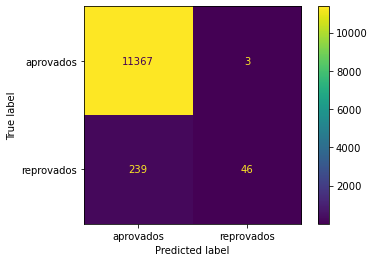

In [11]:
#Visualização da matriz de confusão para o árvore 1
plot_confusion_matrix(clf_podada_1, x_train, y_train, display_labels = ['aprovados', 'reprovados']);

In [12]:
#Acurácia na base de treinamento para o árvore 1
y_hat_train = clf_podada_1.predict(x_train)
accuracy_score(y_train, y_hat_train)

0.9792363792363792

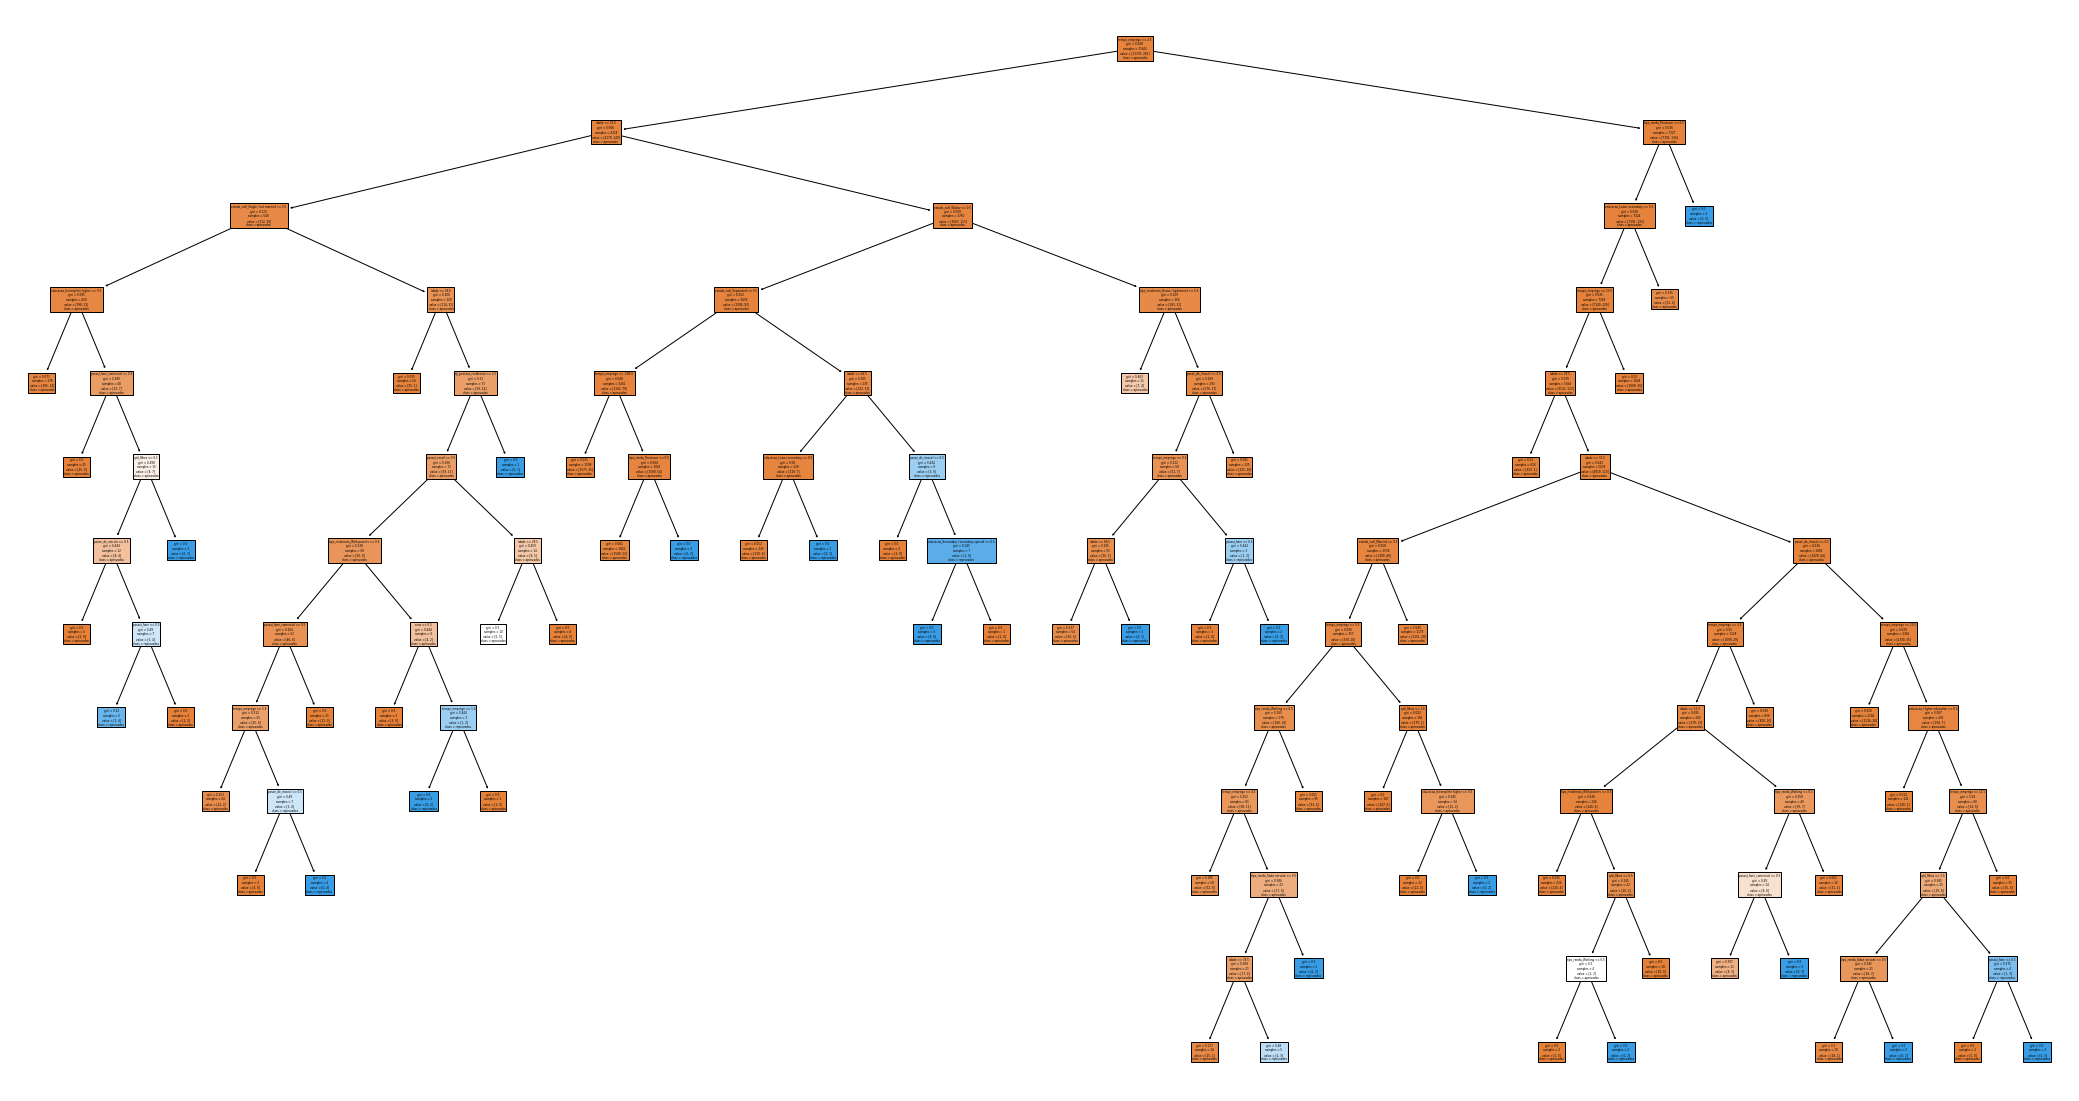

In [13]:
#Plotagem da ávore de decisão para o árvore 1
plt.figure(figsize = (37, 20))
plot_tree(clf_podada_1,
          filled = True,
          class_names = ['aprovados', 'reprovados'],
          feature_names = x_train.columns);

#### Árvore 2 - Menor valor de alpha que maximiza a acurácia do teste 

In [14]:
#Criando uma árvore de decisão para ccp_alpha igual a 0.000118
clf_podada_2 = DecisionTreeClassifier(random_state = 50, ccp_alpha = 0.000118)
clf_podada_2 = clf_podada_2.fit(x_train, y_train)

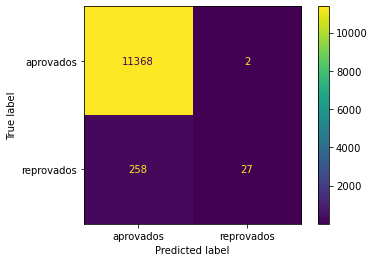

In [15]:
#Visualização da matriz de confusão para o árvore 2
plot_confusion_matrix(clf_podada_2, x_train, y_train, display_labels = ['aprovados', 'reprovados']);

In [16]:
#Acurácia na base de treinamento para o árvore 2
y_hat_train = clf_podada_2.predict(x_train)
accuracy_score(y_train, y_hat_train)

0.9776919776919777

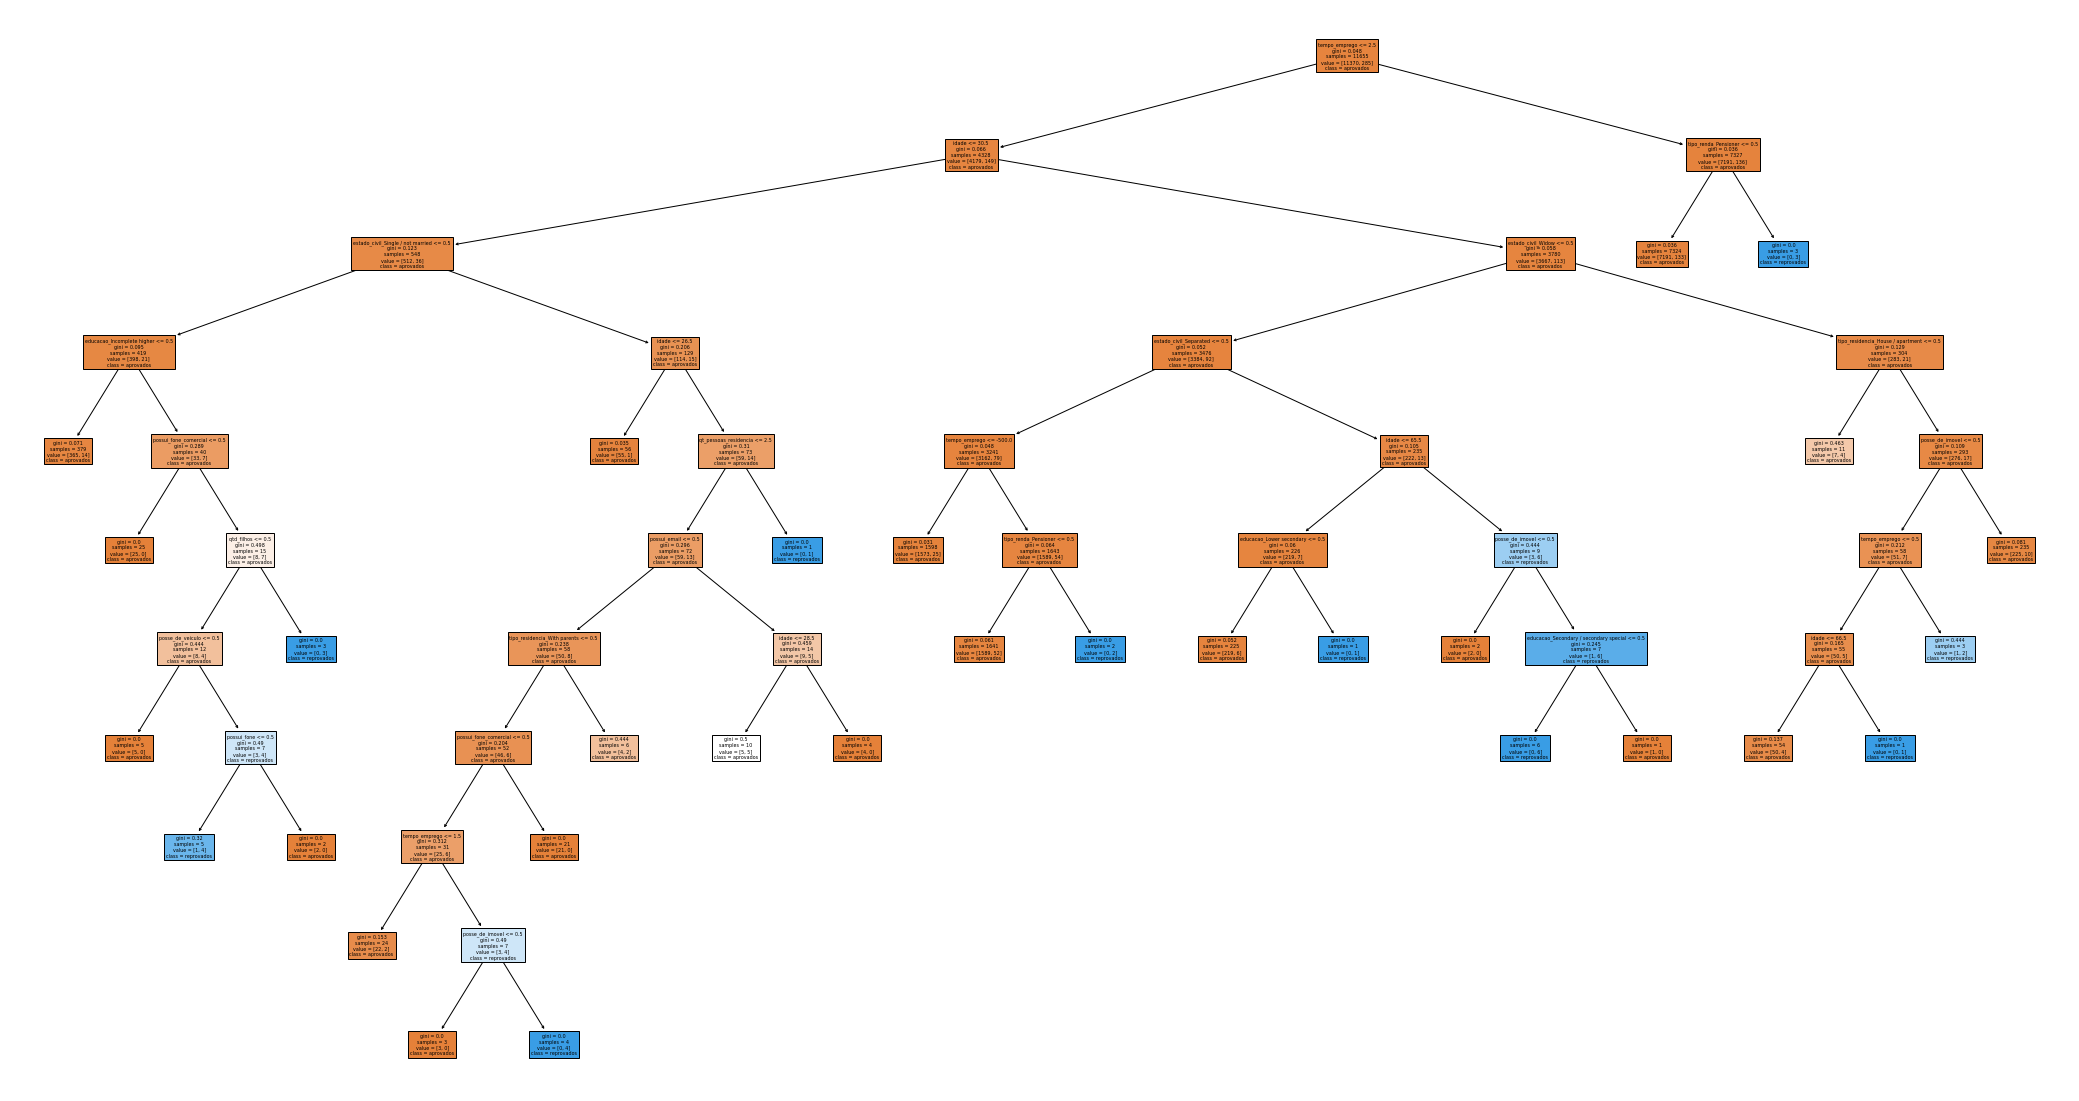

In [17]:
#Plotagem da ávore de decisão para o árvore 2
plt.figure(figsize = (37, 20))
plot_tree(clf_podada_2,
          filled = True,
          class_names = ['aprovados', 'reprovados'],
          feature_names = x_train.columns);

#### Árvore 3 - Um maior valor de alpha que maximiza a acurácia do teste

In [18]:
#Criando uma árvore de decisão para ccp_alpha igual a 0.00017
clf_podada_3 = DecisionTreeClassifier(random_state = 50, ccp_alpha = 0.00017)
clf_podada_3 = clf_podada_3.fit(x_train, y_train)

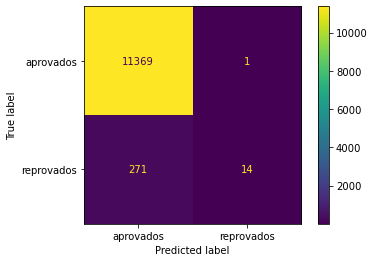

In [19]:
#Visualização da matriz de confusão para o árvore 3
plot_confusion_matrix(clf_podada_3, x_train, y_train, display_labels = ['aprovados', 'reprovados']);

In [20]:
#Acurácia na base de treinamento para o árvore 3
y_hat_train = clf_podada_3.predict(x_train)
accuracy_score(y_train, y_hat_train)

0.9766623766623767

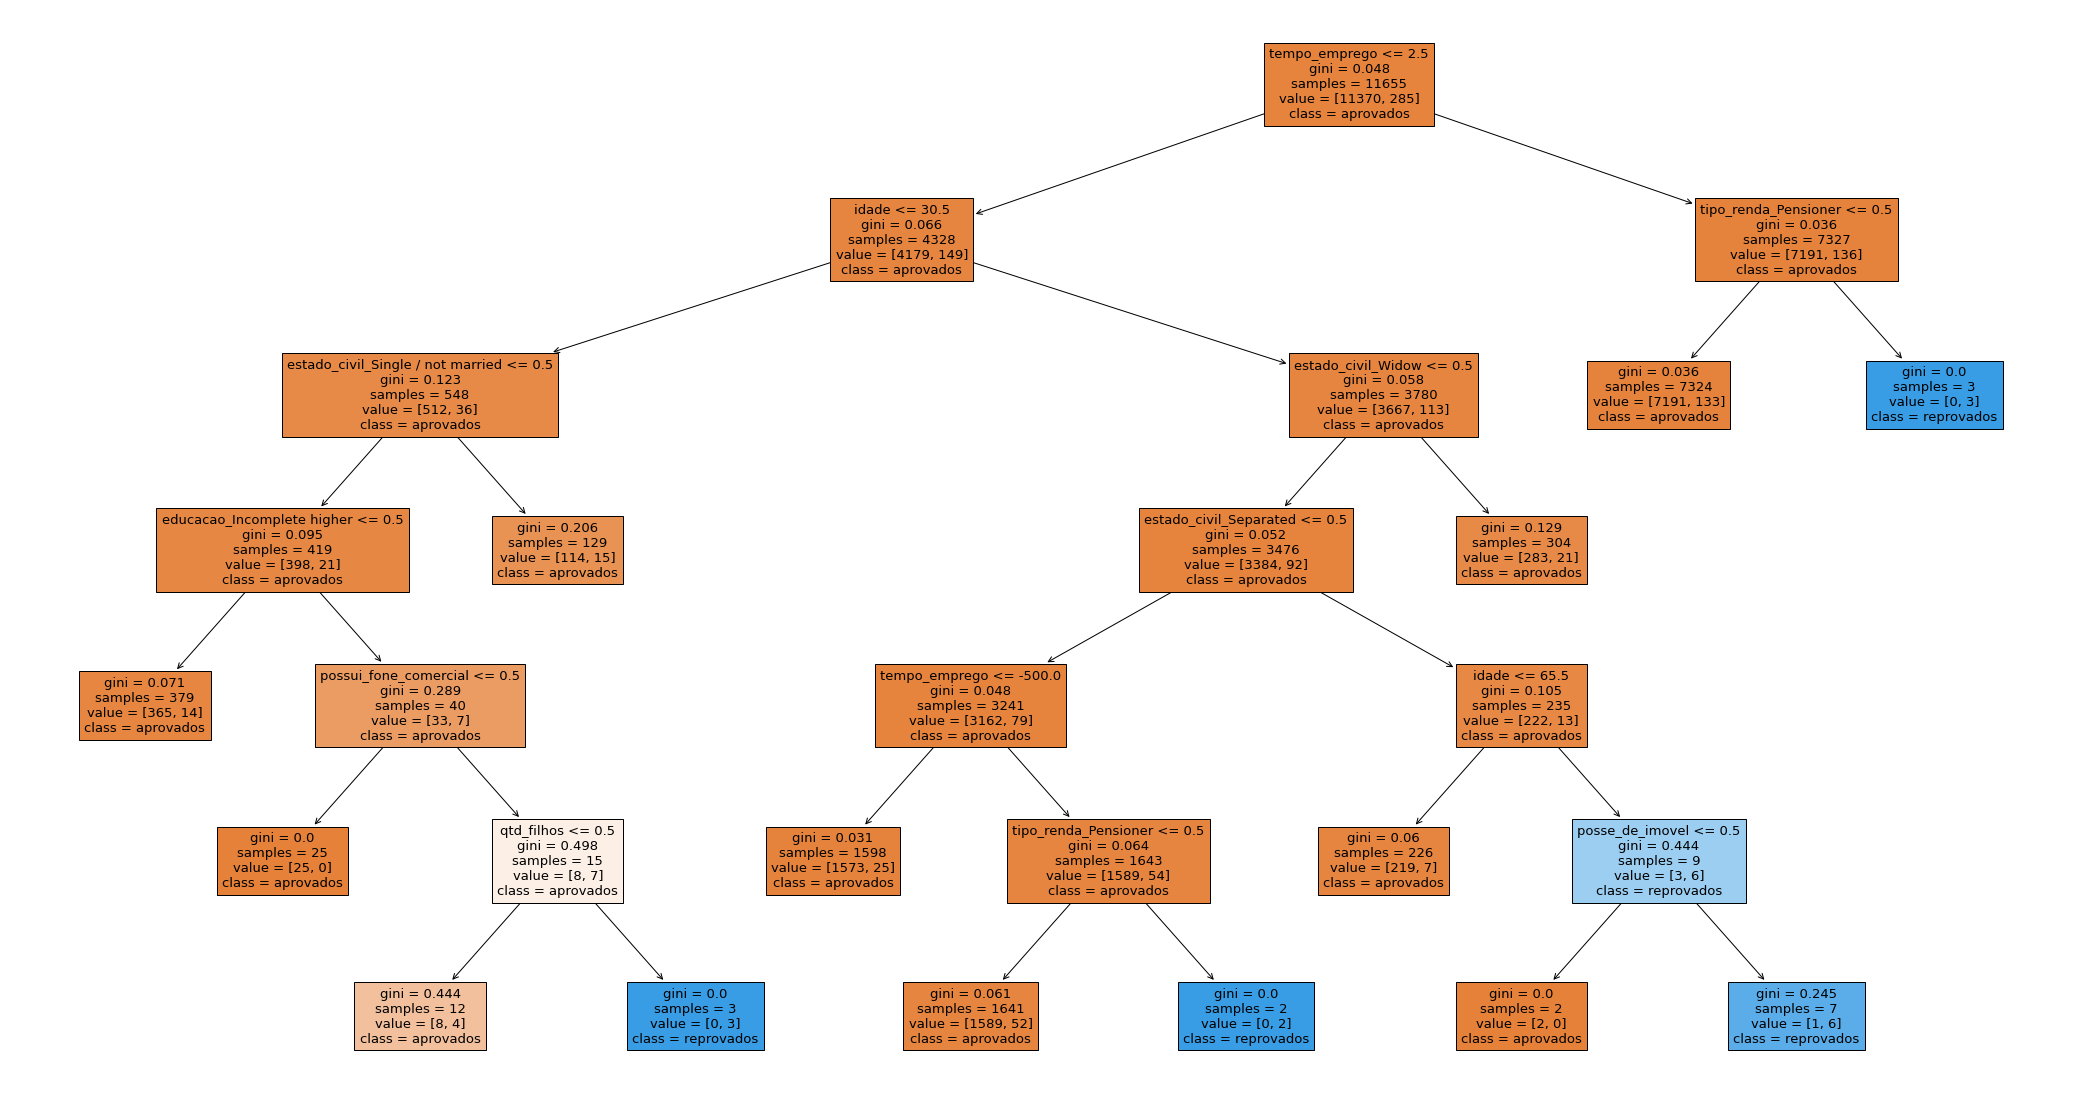

In [21]:
#Plotagem da ávore de decisão para o árvore 3
plt.figure(figsize = (37, 20))
plot_tree(clf_podada_3,
          filled = True,
          class_names = ['aprovados', 'reprovados'],
          feature_names = x_train.columns);

#### Árvore 4 - Valor de alpha que cria uma árvore de decisão que generaliza melhor os dados

In [22]:
#Criando uma árvore de decisão para ccp_alpha igual a 0.000207
clf_podada_4 = DecisionTreeClassifier(random_state = 50, ccp_alpha = 0.000207)
clf_podada_4 = clf_podada_4.fit(x_train, y_train)

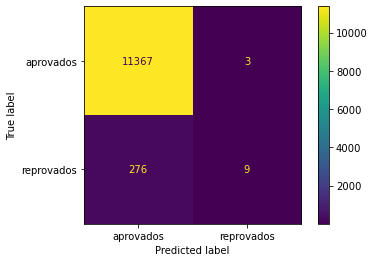

In [23]:
#Visualização da matriz de confusão para o árvore 4
plot_confusion_matrix(clf_podada_4, x_train, y_train, display_labels = ['aprovados', 'reprovados']);

In [24]:
#Acurácia na base de treinamento para o árvore 4
y_hat_train = clf_podada_4.predict(x_train)
accuracy_score(y_train, y_hat_train)

0.976061776061776

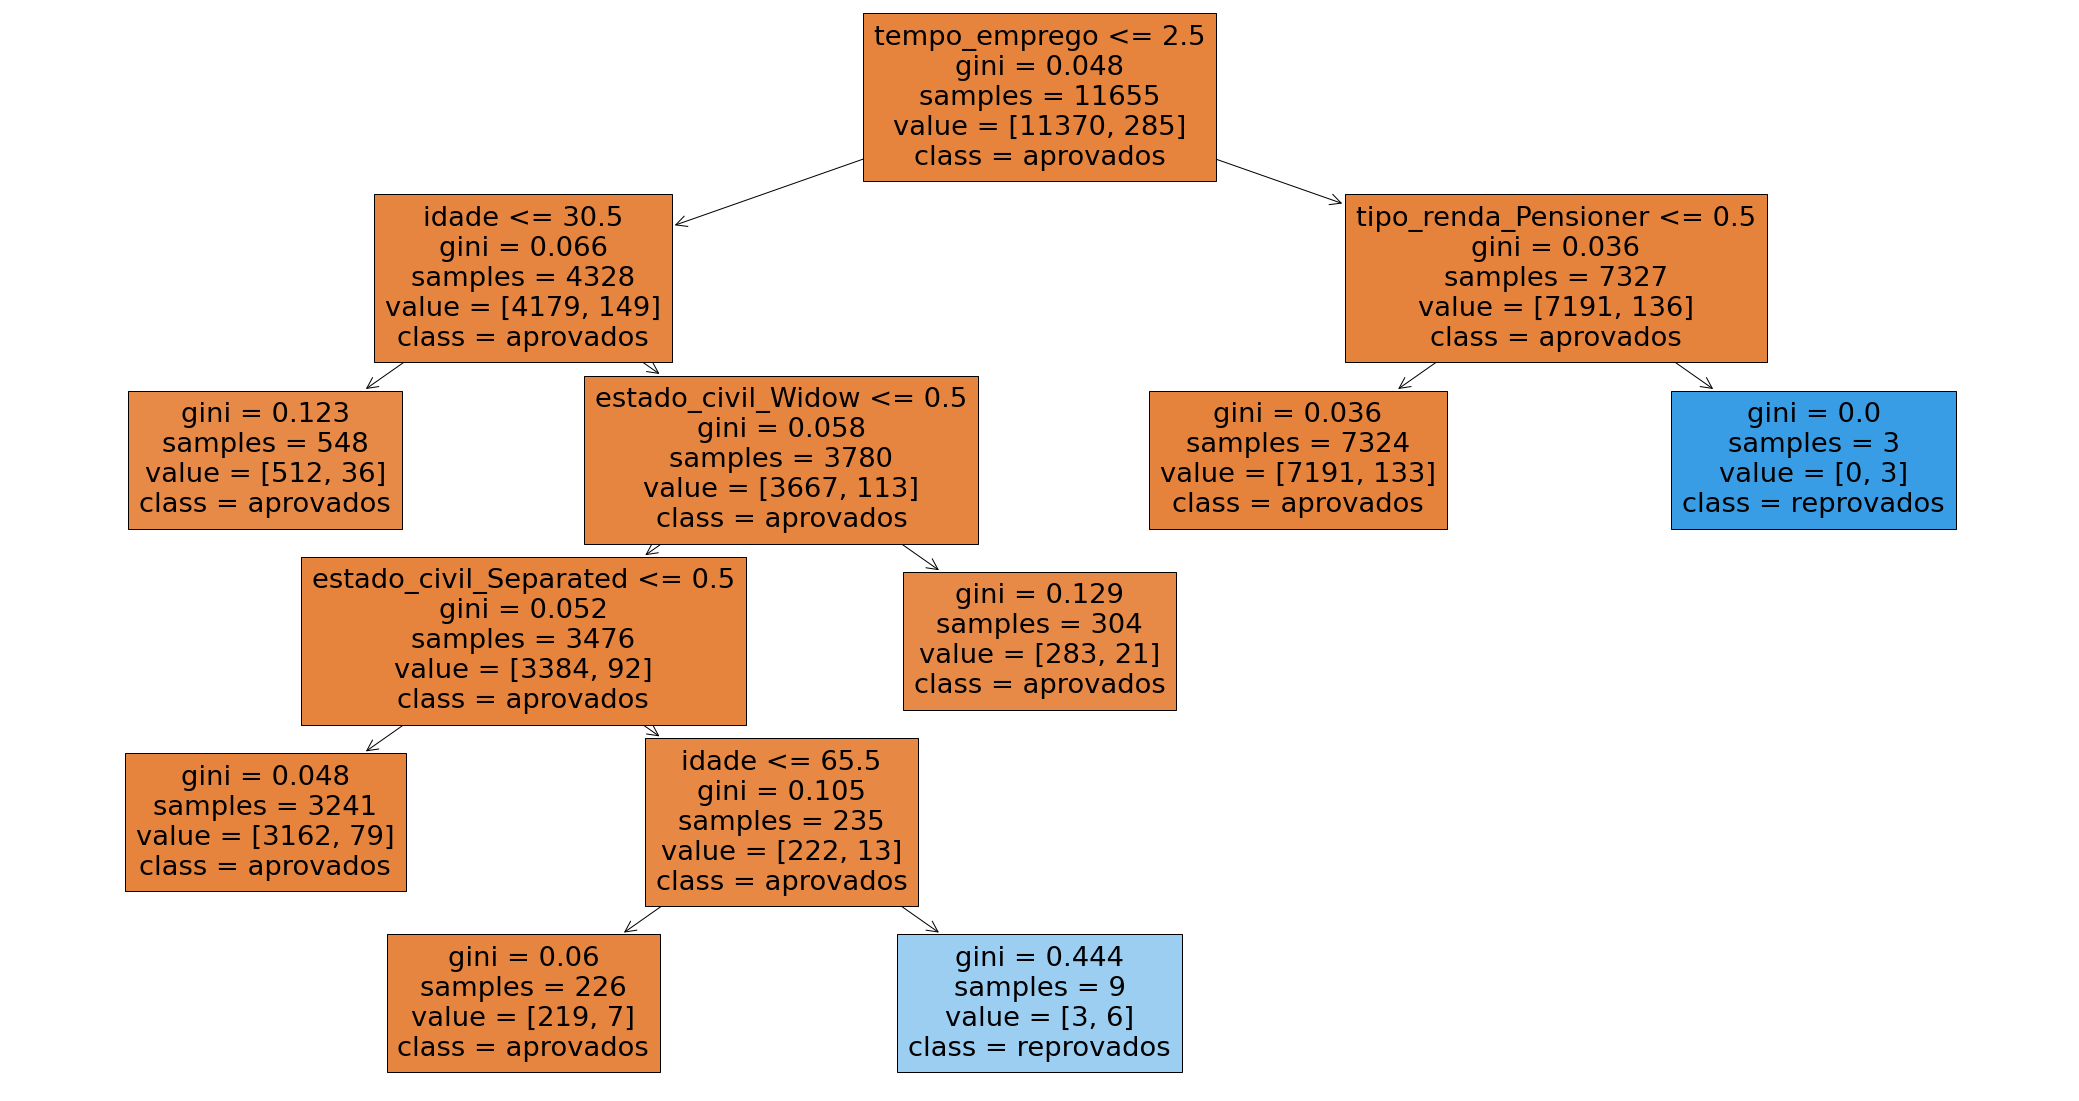

In [25]:
#Plotagem da ávore de decisão para o árvore 4
plt.figure(figsize = (37, 20))
plot_tree(clf_podada_4,
          filled = True,
          class_names = ['aprovados', 'reprovados'],
          feature_names = x_train.columns);

#### Árvore 5 - Generalizando ainda mais os dados

In [26]:
#Criando uma árvore de decisão para ccp_alpha igual a 0.0003
clf_podada_5 = DecisionTreeClassifier(random_state = 50, ccp_alpha = 0.0003)
clf_podada_5 = clf_podada_5.fit(x_train, y_train)

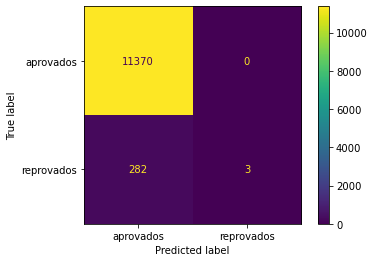

In [27]:
#Visualização da matriz de confusão para o árvore 4
plot_confusion_matrix(clf_podada_5, x_train, y_train, display_labels = ['aprovados', 'reprovados']);

In [28]:
#Acurácia na base de treinamento para o árvore 4
y_hat_train = clf_podada_5.predict(x_train)
accuracy_score(y_train, y_hat_train)

0.9758043758043758

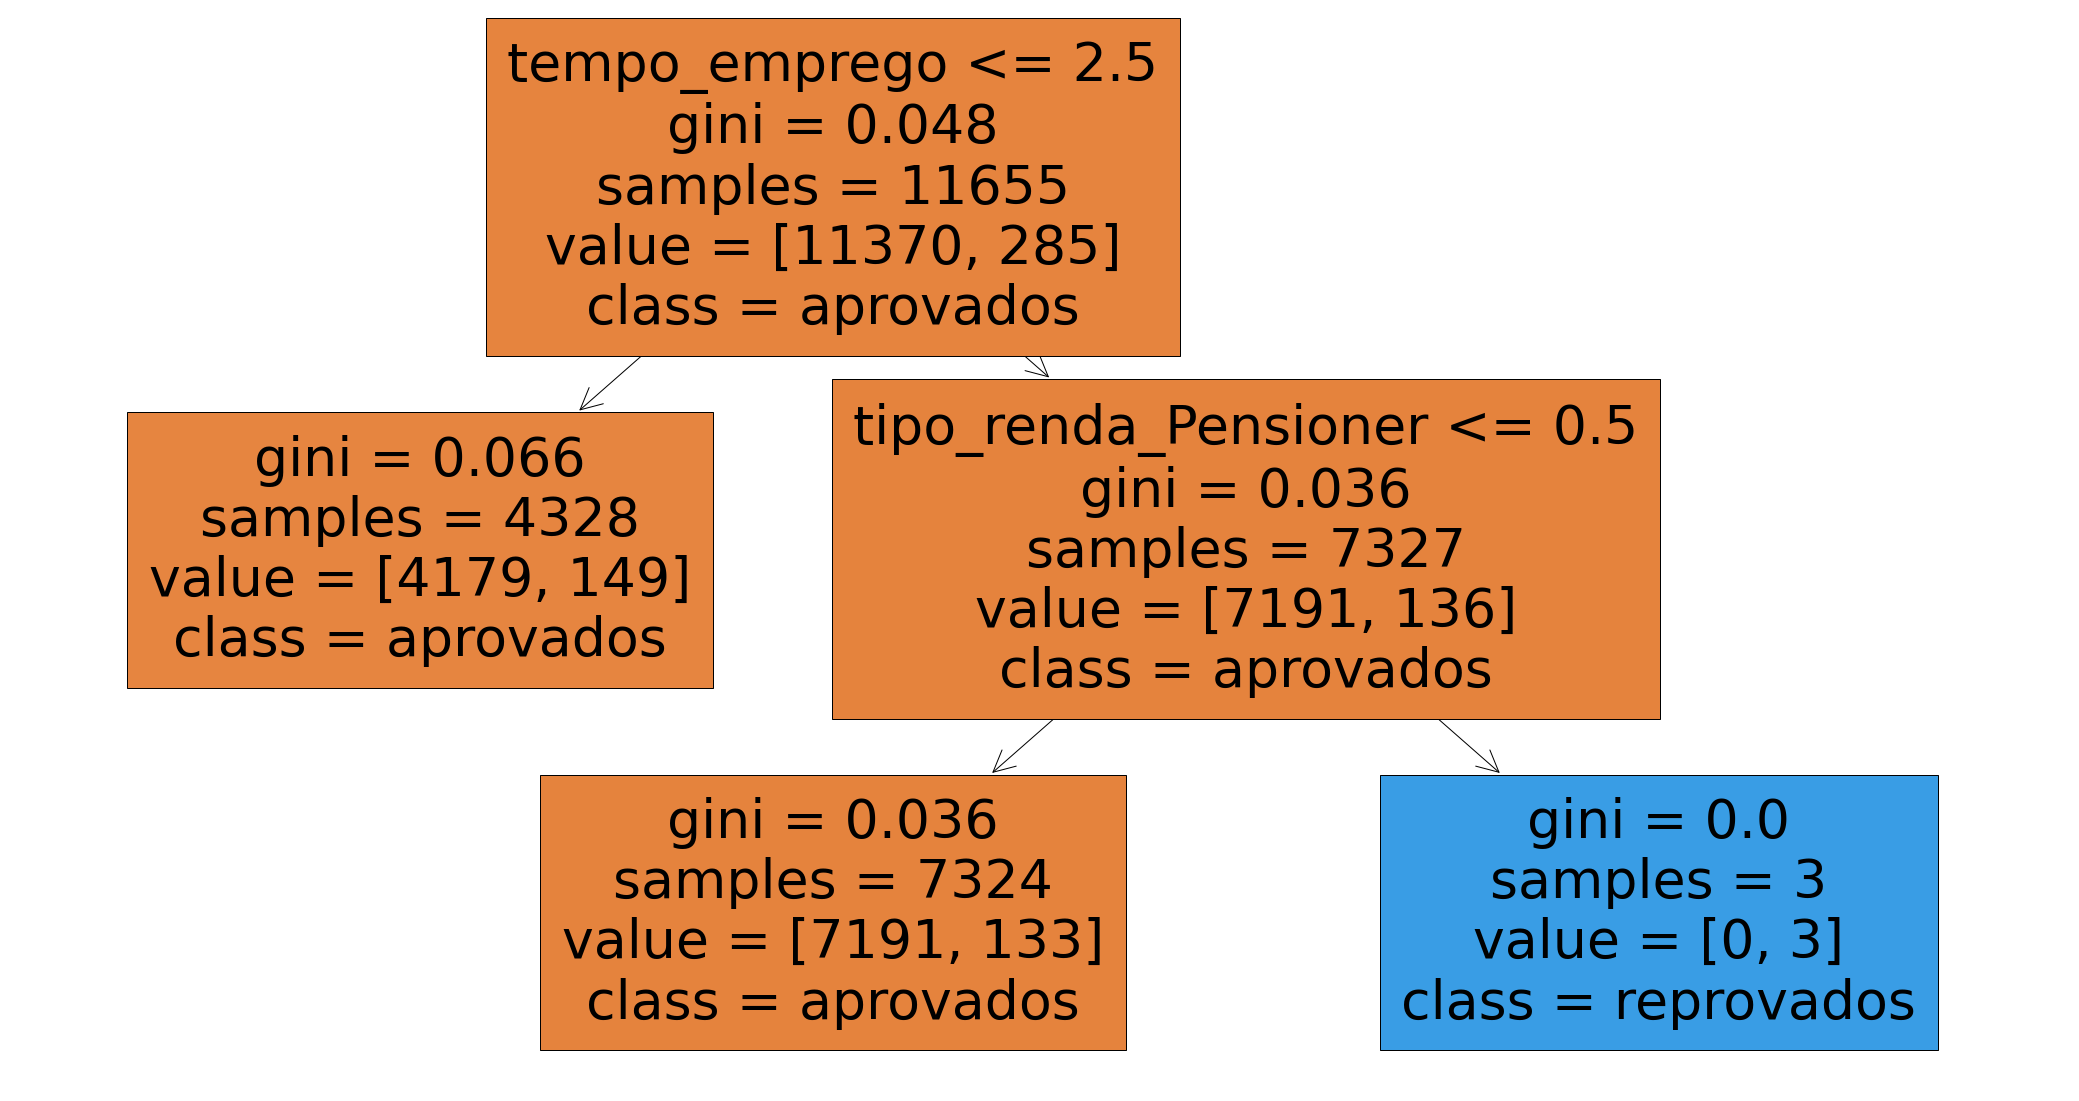

In [29]:
#Plotagem da ávore de decisão para o árvore 4
plt.figure(figsize = (37, 20))
plot_tree(clf_podada_5,
          filled = True,
          class_names = ['aprovados', 'reprovados'],
          feature_names = x_train.columns);

---

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

#### Avaliação dos modelos no conjunto de teste

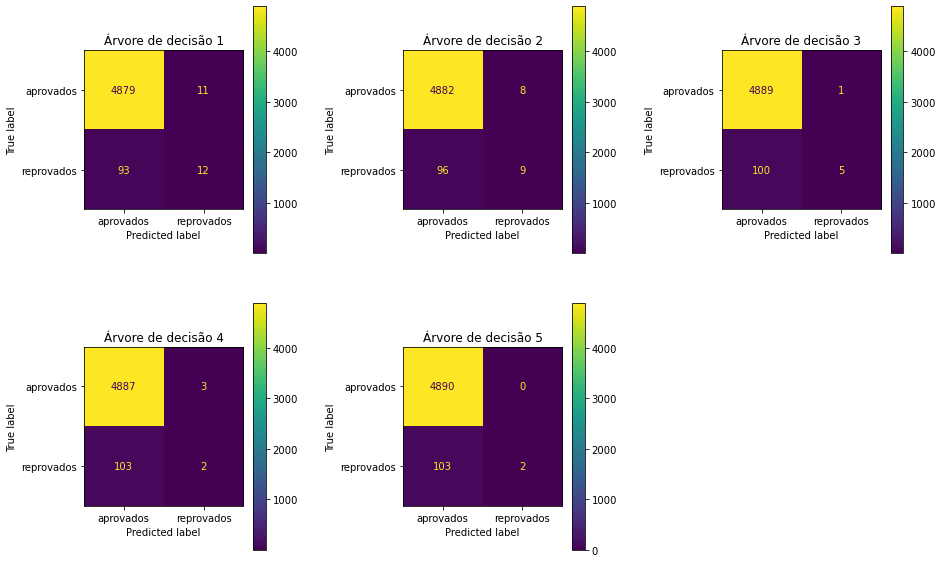

In [30]:
#Vizualização da matriz de confusão para cada modelo
fig = plt.figure(figsize = (15, 10))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)

axes = [ax1, ax2, ax3, ax4, ax5]
clfs = [clf_podada_1, clf_podada_2, clf_podada_3, clf_podada_4, clf_podada_5]

for i in range(5):
    plot_confusion_matrix(estimator = clfs[i],
                          ax = axes[i],
                          X = x_test, 
                          y_true = y_test, 
                          display_labels = ['aprovados', 'reprovados'])
    axes[i].set_title(f'Árvore de decisão {i+1}')

plt.subplots_adjust(wspace = 0.6, hspace = 0.2)

In [31]:
#Comparação da acurácia da base de treino e de teste para cada modelo 
train_accuracy = [clf.score(x_train, y_train) for clf in clfs]
test_accuracy = [clf.score(x_test, y_test) for clf in clfs]
pd.DataFrame({'Treino': train_accuracy, 'Teste': test_accuracy}, 
             index = ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5'])

,Treino,Teste
Modelo 1,0.979236,0.979179
Modelo 2,0.977692,0.979179
Modelo 3,0.976662,0.979780
Modelo 4,0.976062,0.978779
Modelo 5,0.975804,0.979379


#### Treinando uma nova árvore de decisão na base completa

In [32]:
clf_pre_pruning = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 10, random_state = 123)
clf_pre_pruning = clf_pre_pruning.fit(x, y)

0.9783783783783784

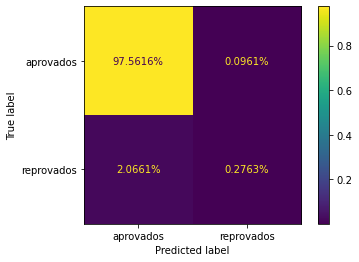

In [33]:
plot_confusion_matrix(clf_pre_pruning, 
                      x, 
                      y, 
                      display_labels = ['aprovados', 'reprovados'],
                      normalize = 'all', 
                     values_format = ".4%");
y_hat = clf_pre_pruning.predict(x)
accuracy_score(y, y_hat)

In [34]:
#Proporção de proponentes classificados como mau pelo modelo
prop = sum(y_hat)/len(y_hat)
vprop = sum(y)/len(y)
print(f'Proporção de proponentes classificados como mau pelo modelo: {prop:.4%}')
print(f'Verdadeira proporção de proponentes classificados como mau: {vprop:.4%}')

Proporção de proponentes classificados como mau pelo modelo: 0.3724%
Verdadeira proporção de proponentes classificados como mau: 2.3423%


In [35]:
#Criando um vetor de mesma dimensão de do vetor target com todos os valores iguais a 1
v = np.full(shape = y.shape, fill_value = 0)
#Acurácia caso todos os contratos sejam avaliados como bons
acc = sum(v == y)/len(v)
print(f'Acurácia de um modelo que classifica todos os contratos como bons: {acc:.4%}')

Acurácia de um modelo que classifica todos os contratos como bons: 97.6577%


---